In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
import numpy as np
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#load  data
data = load_workbook('/content/data_UPDATED.csv.xlsx')

In [3]:
train_data = data['train']
test_data= data['test']

In [4]:


train_data = pd.DataFrame(train_data.values)
test_data = pd.DataFrame(test_data.values)

train_data.to_csv('train_data.csv', index=False)

test_data.to_csv('test_data.csv', index=False)

PREPROCESSING

In [5]:
train_data.columns = train_data.iloc[0]
train_data = train_data[1:]

In [6]:
test_data.columns = test_data.iloc[0]
test_data = test_data[1:]

In [7]:
train_data.head()

,transDate,creditCardNum,business,category,amount,firstName,lastName,gender,street,city,...,zip,latitude,longitude,cityPop,job,dateOfBirth,transNum,merchLatitude,merchLongitude,isFraud
1,2019-01-01 04:28:00,4119762878330980,fraud_Welch Inc,misc_net,4.1,Melinda,Gutierrez,F,1497 West Gateway,Eureka,...,61530,40.7152,-89.2706,6713,Archivist,1945-08-19 00:00:00,3fc1791ff1db94ce9540262d7eb973e4,40.020043,-89.693412,0
2,2019-01-01 04:28:15,36078114201167,fraud_Auer-West,shopping_net,2.67,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,41836,37.2692,-82.9161,798,Facilities manager,1926-06-26 00:00:00,edbf65b8606b53fc48168c2daa5933e5,37.622362,-82.676007,0
3,2019-01-01 04:29:14,4449530933957320,fraud_Balistreri-Nader,misc_pos,22.88,Felicia,Mckee,F,84079 Thomas Burgs,Tomales,...,94971,38.2427,-122.9145,337,Occupational psychologist,1954-07-05 00:00:00,2fcbde131cff833751dde53da54da6da,39.060101,-121.969417,0
4,2019-01-01 04:29:18,4302475216404890,"fraud_Boehm, Predovic and Reinger",misc_pos,9.59,Daniel,Cain,M,384 Newman Forks Apt. 370,Belmond,...,50421,42.8511,-93.62,3032,Community pharmacist,1964-08-08 00:00:00,bcae564f9a1a299dfbd1efd917499968,43.280848,-94.340312,0
5,2019-01-01 04:32:09,377234009633447,fraud_Hudson-Ratke,grocery_pos,129.06,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,...,25442,39.3716,-77.8229,1925,Systems developer,1966-02-14 00:00:00,5e42e35c255edb55a192b3f1f0600936,39.21163,-78.409044,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181822 entries, 1 to 181822
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   transDate       181822 non-null  object
 1   creditCardNum   181822 non-null  object
 2   business        181822 non-null  object
 3   category        181822 non-null  object
 4   amount          181822 non-null  object
 5   firstName       181822 non-null  object
 6   lastName        181822 non-null  object
 7   gender          181822 non-null  object
 8   street          181822 non-null  object
 9   city            181822 non-null  object
 10  state           181822 non-null  object
 11  zip             181822 non-null  object
 12  latitude        181822 non-null  object
 13  longitude       181822 non-null  object
 14  cityPop         181822 non-null  object
 15  job             181822 non-null  object
 16  dateOfBirth     181822 non-null  object
 17  transNum        181822 non-nu

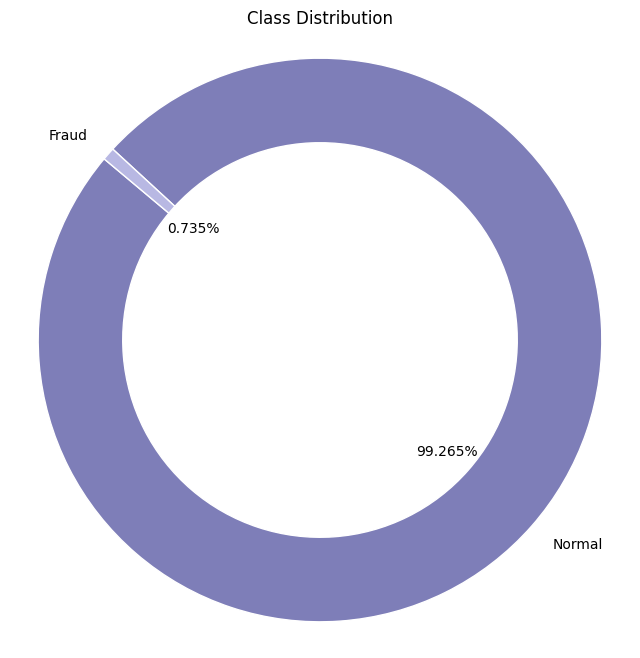

In [11]:

# Calculate the class distribution
class_distribution = train_data['isFraud'].value_counts()

# Define colors for the donut chart (lavender color theme)
colors = ['#7E7EB8', '#B8B8E3']

# Plot a donut chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, autopct='%1.3f%%', labels=['Normal', 'Fraud'], colors=colors, startangle=140,
        wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title('Class Distribution')
plt.axis('equal')
plt.show()


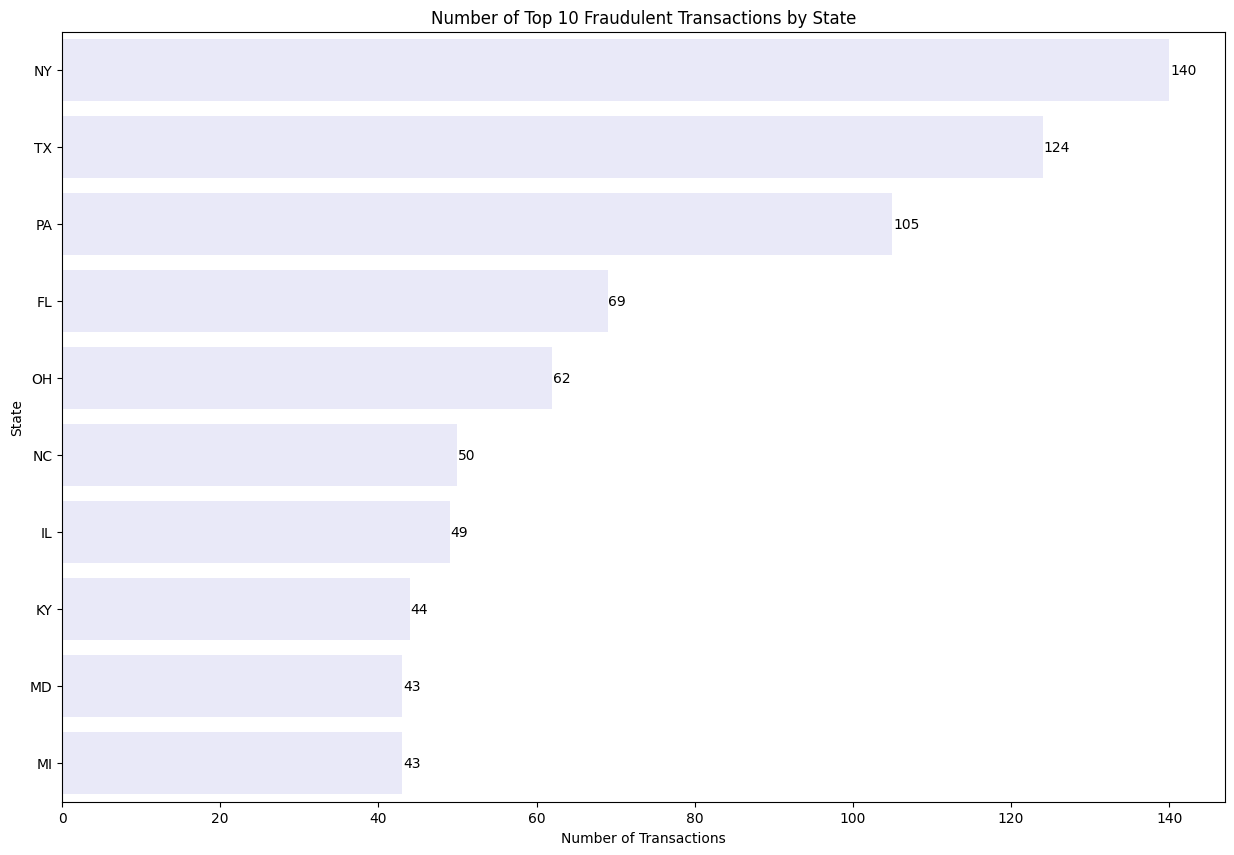

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Set the custom palette with shades of lavender
custom_palette = ['#E6E6FA', '#D8BFD8', '#DDA0DD', '#EE82EE', '#DA70D6', '#FF00FF', '#BA55D3', '#9370DB', '#8A2BE2', '#9400D3']
sns.set_palette(custom_palette)

# Filter data for fraudulent transactions
fraudulent_states = train_data[train_data['isFraud'] == 1]['state']

# Count the occurrences of each state and select the top 10 states
state_counts = fraudulent_states.value_counts().head(10)

# Create the countplot
ax = sns.countplot(y=fraudulent_states, order=state_counts.index)

# Add values to each bar
for i, value in enumerate(state_counts.values):
    ax.text(value + 0.1, i, str(value), va='center', fontsize=10, color='black')

plt.title('Number of Top 10 Fraudulent Transactions by State')
plt.xlabel('Number of Transactions')
plt.ylabel('State')
plt.show()




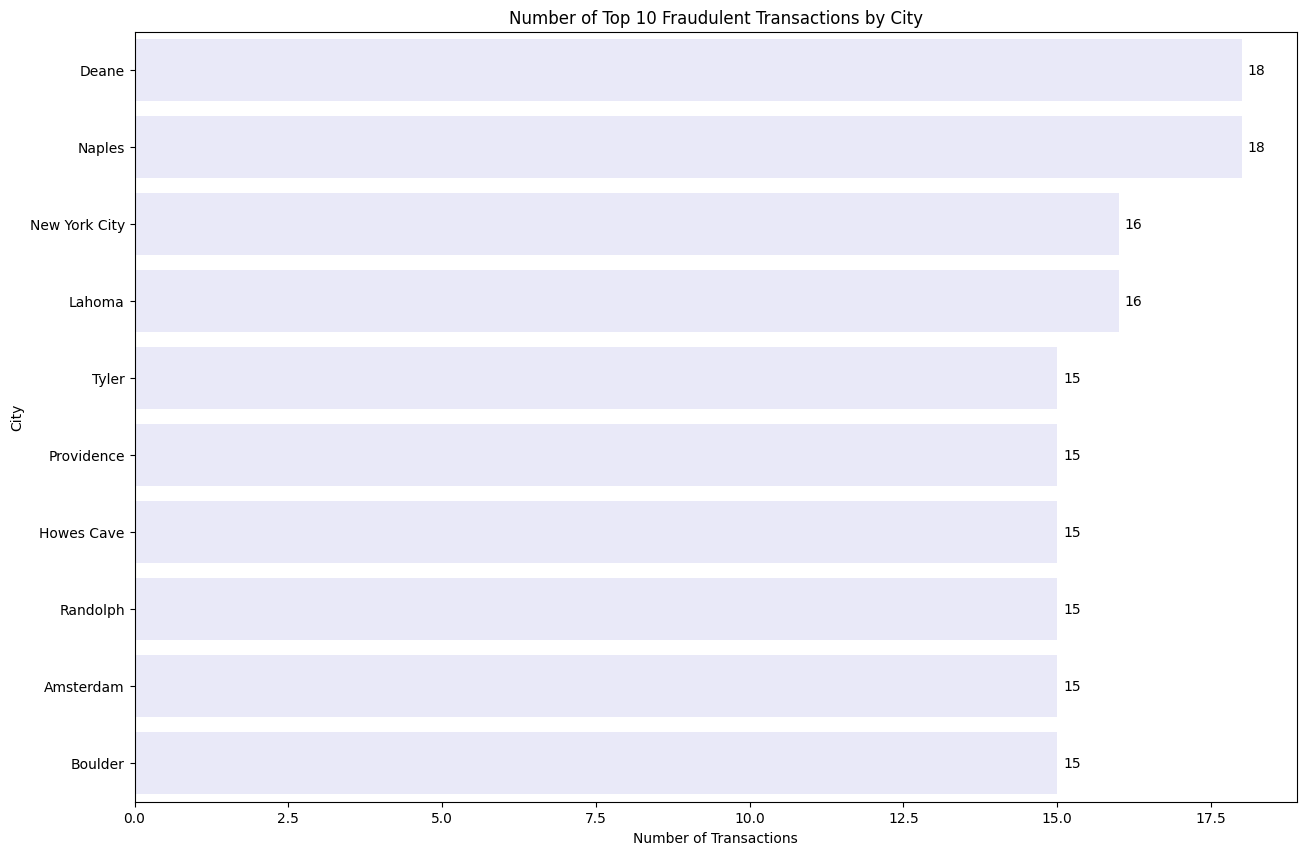

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Set the custom palette with shades of lavender
custom_palette = ['#E6E6FA', '#D8BFD8', '#DDA0DD', '#EE82EE', '#DA70D6', '#FF00FF', '#BA55D3', '#9370DB', '#8A2BE2', '#9400D3']
sns.set_palette(custom_palette)

# Filter data for fraudulent transactions
fraudulent_cities = train_data[train_data['isFraud'] == 1]['city']

# Count the occurrences of each city and select the top 10 cities
city_counts = fraudulent_cities.value_counts().head(10)

# Create the countplot
ax = sns.countplot(y=fraudulent_cities, order=city_counts.index)

# Add values to each bar
for i, value in enumerate(city_counts.values):
    ax.text(value + 0.1, i, str(value), va='center', fontsize=10, color='black')

plt.title('Number of Top 10 Fraudulent Transactions by City')
plt.xlabel('Number of Transactions')
plt.ylabel('City')
plt.show()


In [23]:
drop_list=['firstName','lastName','street','cityPop','transNum']
train_data=train_data.drop(columns=drop_list)

In [24]:
#Assuming 'transDate' is a column in your DataFrame
train_data['transDate'] = pd.to_datetime(train_data['transDate'])

#Extract temporal features
train_data['year'] = train_data['transDate'].dt.year
train_data['month'] = train_data['transDate'].dt.month
train_data['day'] = train_data['transDate'].dt.day
train_data['hour'] = train_data['transDate'].dt.hour
train_data['minute'] =train_data['transDate'].dt.minute
train_data['weekday'] = train_data['transDate'].dt.weekday  # Monday=0, Sunday=6

#Encode categorical features
df = pd.get_dummies(train_data, columns=['month', 'weekday'])  # One-hot encode month and weekday

#Drop original 'transDate' column
df.drop(columns=['transDate'], inplace=True)
train_data.drop(columns=['transDate'], inplace=True)


In [25]:
# Define a function to calculate age from date of birth
def calculate_age(date_string):
    # Convert date string to datetime object
    date_obj = datetime.strptime(str(date_string), '%Y-%m-%d %H:%M:%S')

    # Get current date
    current_date = datetime.now()

    # Calculate age
    age = current_date.year - date_obj.year - ((current_date.month, current_date.day) < (date_obj.month, date_obj.day))

    return age


# Apply the calculate_age function to the dateOfBirth column to create a new 'age' column
train_data['age'] = train_data['dateOfBirth'].apply(calculate_age)

# Drop the original 'dateOfBirth' column if not needed anymore
train_data.drop(columns=['dateOfBirth'], inplace=True)

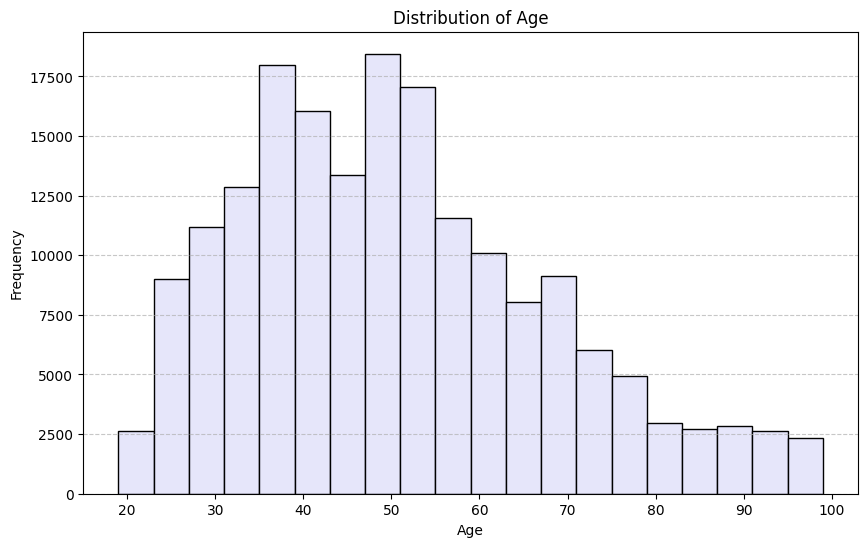

In [40]:

plt.figure(figsize=(10, 6))

# Set the color to lavender
plt.hist(train_data['age'], bins=20, color='#E6E6FA', edgecolor='black')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [26]:
train_data['creditCardNum']=train_data['creditCardNum'].astype(int)
train_data['amount']=train_data['amount'].astype(int)
train_data['zip']=train_data['zip'].astype(int)
train_data['latitude']=train_data['latitude'].astype(float)
train_data['longitude']=train_data['longitude'].astype(float)
train_data['merchLatitude']=train_data['merchLatitude'].astype(float)
train_data['merchLongitude']=train_data['merchLongitude'].astype(float)
train_data['isFraud']=train_data['isFraud'].astype(int)

In [28]:
cat_val=['business','category','gender','city','state','job']
label_encoder=LabelEncoder()
for column in cat_val:
  train_data[column +'_encoded']=label_encoder.fit_transform(train_data[column])

In [29]:
train_data=train_data.drop(columns=cat_val,axis=1)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181822 entries, 1 to 181822
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   creditCardNum     181822 non-null  int64  
 1   amount            181822 non-null  int64  
 2   zip               181822 non-null  int64  
 3   latitude          181822 non-null  float64
 4   longitude         181822 non-null  float64
 5   merchLatitude     181822 non-null  float64
 6   merchLongitude    181822 non-null  float64
 7   isFraud           181822 non-null  int64  
 8   year              181822 non-null  int32  
 9   month             181822 non-null  int32  
 10  day               181822 non-null  int32  
 11  hour              181822 non-null  int32  
 12  minute            181822 non-null  int32  
 13  weekday           181822 non-null  int32  
 14  age               181822 non-null  int64  
 15  business_encoded  181822 non-null  int64  
 16  category_encoded  18

In [32]:
X=train_data.drop(['isFraud'],axis=1)
y=train_data['isFraud']

In [33]:
y.value_counts()

isFraud
0    180486
1      1336
Name: count, dtype: int64


**Test data preprocessing and Feature engineering**



In [35]:
drop_list=['firstName','lastName','street','cityPop','transNum']
test_data=test_data.drop(columns=drop_list)

In [36]:
#Assuming 'transDate' is a column in your DataFrame
test_data['transDate'] = pd.to_datetime(test_data['transDate'])

#Extract temporal features
test_data['year'] = test_data['transDate'].dt.year
test_data['month'] = test_data['transDate'].dt.month
test_data['day'] = test_data['transDate'].dt.day
test_data['hour'] = test_data['transDate'].dt.hour
test_data['minute'] =test_data['transDate'].dt.minute
test_data['weekday'] = test_data['transDate'].dt.weekday  # Monday=0, Sunday=6

#Encode categorical features
df = pd.get_dummies(test_data, columns=['month', 'weekday'])  # One-hot encode month and weekday

#Drop original 'transDate' column
df.drop(columns=['transDate'], inplace=True)
test_data.drop(columns=['transDate'], inplace=True)

In [37]:

# Apply the calculate_age function to the dateOfBirth column to create a new 'age' column
test_data['age'] = test_data['dateOfBirth'].apply(calculate_age)

# Drop the original 'dateOfBirth' column if not needed anymore
test_data.drop(columns=['dateOfBirth'], inplace=True)

In [41]:
test_data['creditCardNum']=test_data['creditCardNum'].astype(int)
test_data['amount']=test_data['amount'].astype(int)
test_data['zip']=test_data['zip'].astype(int)
test_data['latitude']=test_data['latitude'].astype(float)
test_data['longitude']=test_data['longitude'].astype(float)
test_data['merchLatitude']=test_data['merchLatitude'].astype(float)
test_data['merchLongitude']=test_data['merchLongitude'].astype(float)


In [42]:
for column in cat_val:
  test_data[column +'_encoded']=label_encoder.fit_transform(test_data[column])

In [43]:
test_data=test_data.drop(columns=cat_val,axis=1)

In [82]:
X_test=test_data.drop(['isFraud'],axis=1)
y_test=test_data['isFraud']

**TRAIN-VALIDATION SPLIT**

In [45]:
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
#BALANCING DATA USING SMOTE
smt=SMOTE()
X_train_sm ,y_train_sm= smt.fit_resample(X_train,y_train)

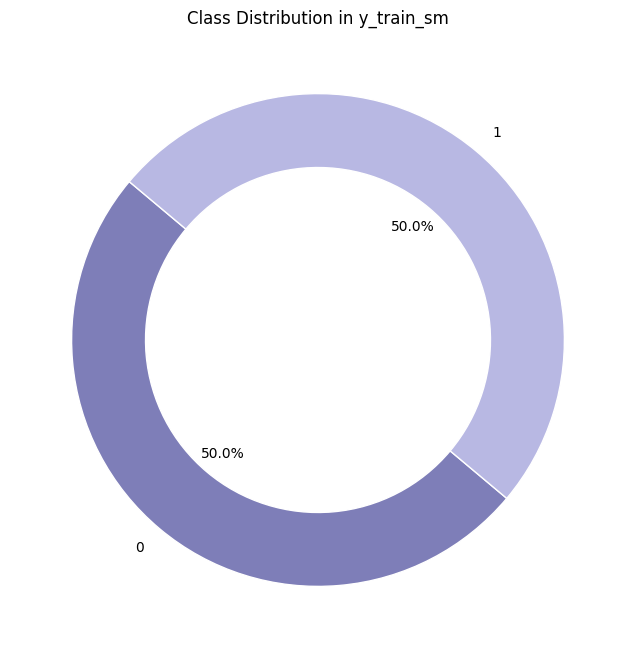

In [47]:
import matplotlib.pyplot as plt

# Calculate the class distribution in y_train_sm
class_distribution = y_train_sm.value_counts()

# Define colors for the donut chart (lavender color theme)
colors = ['#7E7EB8', '#B8B8E3']

# Plot a donut chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(width=0.3, edgecolor='w'), colors=colors)  # Set the colors
plt.title('Class Distribution in y_train_sm')
plt.show()


In [48]:
#without SMOTE
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf_1 = rf_classifier.predict(X_val)


# Calculate precision
precision_rf_1 = precision_score(y_val, y_pred_rf_1)

# Calculate recall
recall_rf_1 = recall_score(y_val, y_pred_rf_1)

# Calculate F1 score
f1_rf_1 = f1_score(y_val, y_pred_rf_1)

print("Precision of Random forest without SMOTE:", precision_rf_1)
print("Recall of Random forest without SMOTE:", recall_rf_1)
print("F1 Score of Random forest without SMOTE:", f1_rf_1)


Precision of Random forest without SMOTE: 0.9791666666666666
Recall of Random forest without SMOTE: 0.7094339622641509
F1 Score of Random forest without SMOTE: 0.8227571115973741


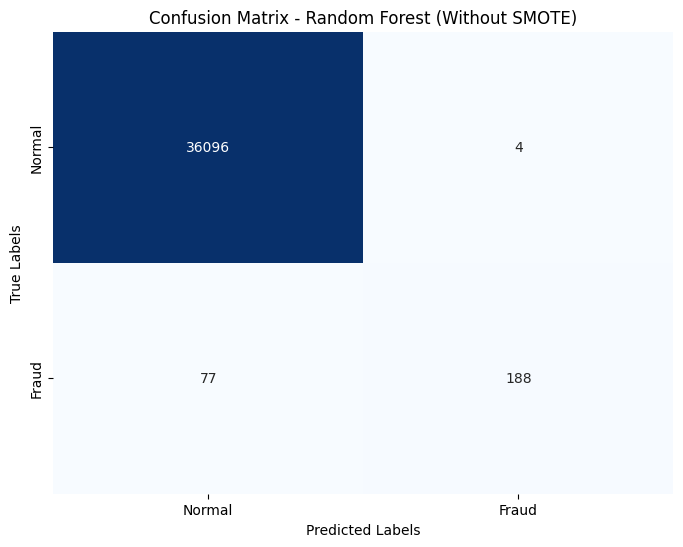

In [61]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm_rf_1 = confusion_matrix(y_val, y_pred_rf_1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - Random Forest (Without SMOTE)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [49]:
#with SMOTE
# Initialize the Random Forest classifier
rf_classifier_sm = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier_sm.fit(X_train_sm, y_train_sm)

# Make predictions on the test data
y_pred_rf_2 = rf_classifier_sm.predict(X_val)


# Calculate precision
precision_rf_2 = precision_score(y_val, y_pred_rf_2)

# Calculate recall
recall_rf_2 = recall_score(y_val, y_pred_rf_2)

# Calculate F1 score
f1_rf_2 = f1_score(y_val, y_pred_rf_2)

print("Precision of Random forest with SMOTE:", precision_rf_2)
print("Recall of Random forest with SMOTE:", recall_rf_2)
print("F1 Score of Random forest with SMOTE:", f1_rf_2)

Precision of Random forest with SMOTE: 0.836
Recall of Random forest with SMOTE: 0.7886792452830189
F1 Score of Random forest with SMOTE: 0.8116504854368933


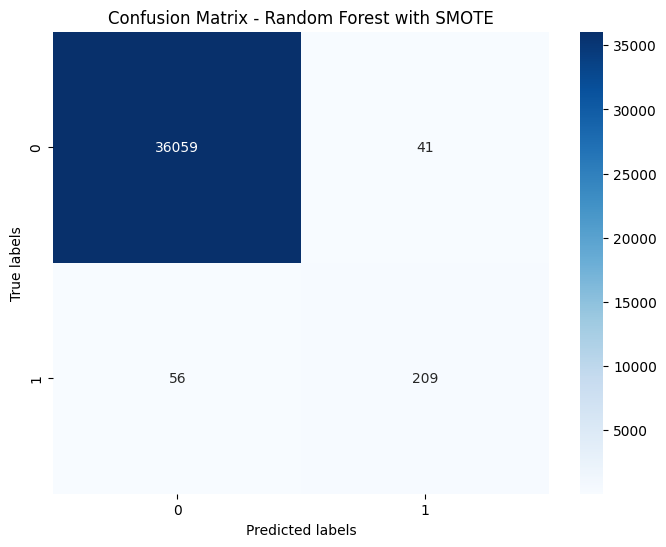

In [62]:
# Calculate confusion matrix
conf_matrix_rf_sm = confusion_matrix(y_val, y_pred_rf_2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_sm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest with SMOTE')
plt.show()

<ipython-input-50-6e14653789e9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_importances, y=top_10_features, palette="viridis")


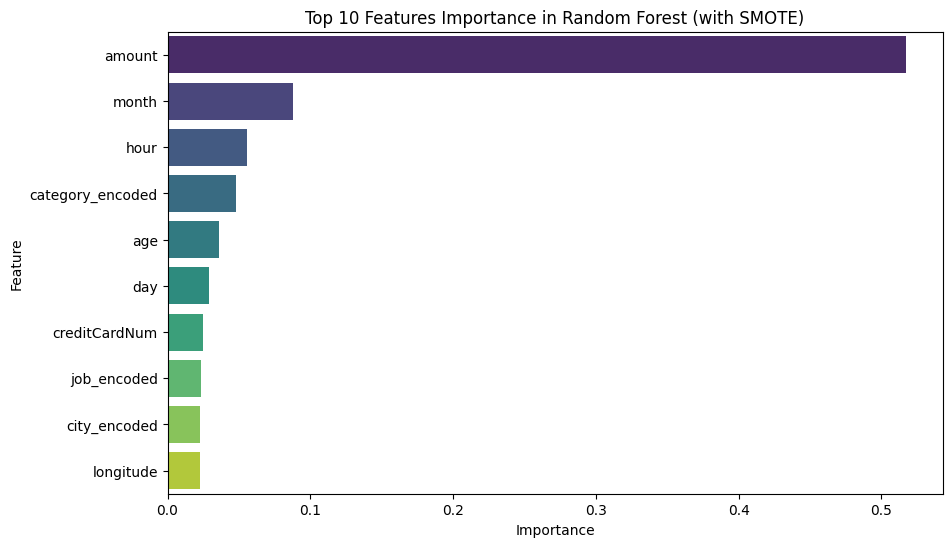

In [50]:

    feature_importances = rf_classifier_sm.feature_importances_

    # Pair feature importances with their corresponding feature names
    feature_importance_dict = dict(zip(X_train_sm.columns, feature_importances))

    # Sort feature importance values in descending order
    sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Get top 10 features and their importances
    top_10_features = [x[0] for x in sorted_feature_importances[:10]]
    top_10_importances = [x[1] for x in sorted_feature_importances[:10]]

    # Create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_10_importances, y=top_10_features, palette="viridis")
    plt.title('Top 10 Features Importance in Random Forest (with SMOTE)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()



In [51]:
#XGBOOST CLASSIFIER WITHOUT SMOTE

from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming X_train_sm, y_train_sm, X_val, y_val are already defined after applying SMOTE

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the model on the SMOTE-transformed training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_xgb = xgb_classifier.predict(X_val)

# Calculate precision
precision_xgb = precision_score(y_val, y_pred_xgb)

# Calculate recall
recall_xgb = recall_score(y_val, y_pred_xgb)

# Calculate F1 score
f1_xgb = f1_score(y_val, y_pred_xgb)

print("Precision of XGBoost without SMOTE:", precision_xgb)
print("Recall of XGBoost without SMOTE:", recall_xgb)
print("F1 Score of XGBoost without SMOTE:", f1_xgb)


Precision of XGBoost without SMOTE: 0.9866666666666667
Recall of XGBoost without SMOTE: 0.8377358490566038
F1 Score of XGBoost without SMOTE: 0.9061224489795919


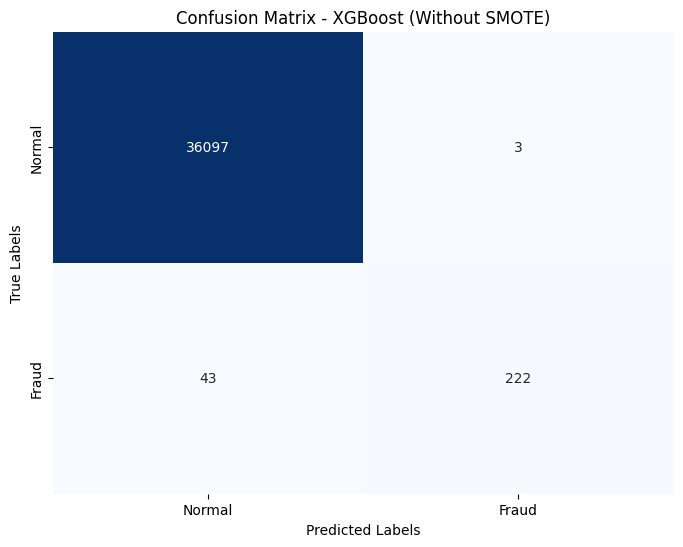

In [63]:
cm_xgb = confusion_matrix(y_val, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - XGBoost (Without SMOTE)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [52]:
#XGBOOST CLASSIFIER WITH SMOTE

from xgboost import XGBClassifier


# Initialize the XGBoost classifier
xgb_classifier_sm = XGBClassifier()

# Train the model on the SMOTE-transformed training data
xgb_classifier_sm.fit(X_train_sm, y_train_sm)

# Make predictions on the validation data
y_pred_xgb_sm = xgb_classifier_sm.predict(X_val)

# Calculate precision
precision_xgb_sm = precision_score(y_val, y_pred_xgb_sm)

# Calculate recall
recall_xgb_sm = recall_score(y_val, y_pred_xgb_sm)

# Calculate F1 score
f1_xgb_sm = f1_score(y_val, y_pred_xgb_sm)

print("Precision of XGBoost with SMOTE:", precision_xgb_sm)
print("Recall of XGBoost with SMOTE:", recall_xgb_sm)
print("F1 Score of XGBoost with SMOTE:", f1_xgb_sm)


Precision of XGBoost with SMOTE: 0.8191126279863481
Recall of XGBoost with SMOTE: 0.9056603773584906
F1 Score of XGBoost with SMOTE: 0.8602150537634409


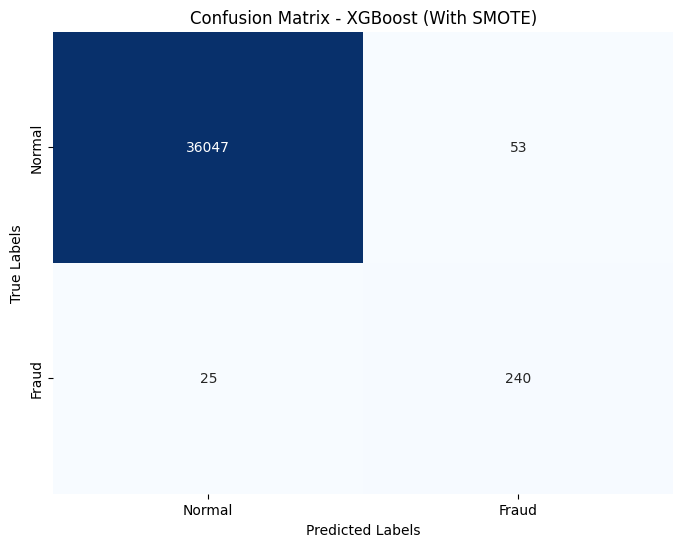

In [64]:
# Generate confusion matrix
cm_xgb_sm = confusion_matrix(y_val, y_pred_xgb_sm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_sm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - XGBoost (With SMOTE)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [53]:
#DECISION TREE without smote
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_tree = tree_classifier.predict(X_val)

# Calculate precision
precision_tree = precision_score(y_val, y_pred_tree)

# Calculate recall
recall_tree = recall_score(y_val, y_pred_tree)

# Calculate F1 score
f1_tree = f1_score(y_val, y_pred_tree)

print("Precision of Decision Tree without SMOTE:", precision_tree)
print("Recall of Decision Tree without SMOTE:", recall_tree)
print("F1 Score of Decision Tree without SMOTE: ", f1_tree)


Precision of Decision Tree without SMOTE: 0.8645418326693227
Recall of Decision Tree without SMOTE: 0.8188679245283019
F1 Score of Decision Tree without SMOTE:  0.8410852713178294


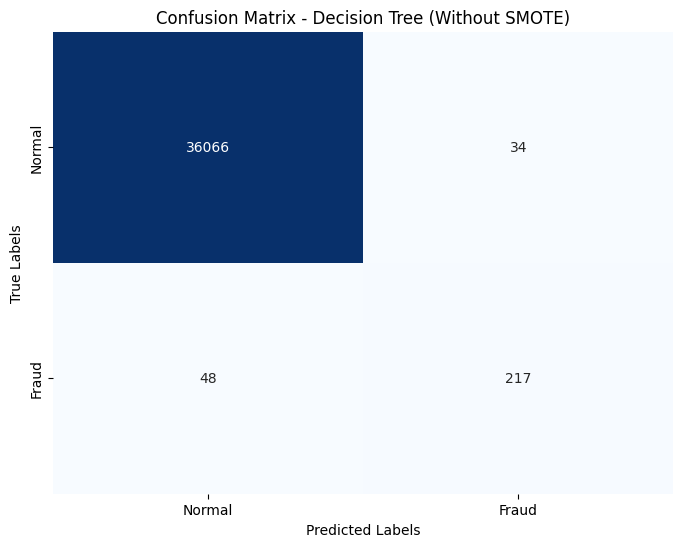

In [65]:
cm_tree = confusion_matrix(y_val, y_pred_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - Decision Tree (Without SMOTE)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [54]:
#DECISION TREE with smote

# Initialize the Decision Tree classifier
tree_classifier_sm = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
tree_classifier_sm.fit(X_train_sm, y_train_sm)

# Make predictions on the validation data
y_pred_tree_sm = tree_classifier_sm.predict(X_val)

# Calculate precision
precision_tree_sm = precision_score(y_val, y_pred_tree_sm)

# Calculate recall
recall_tree_sm = recall_score(y_val, y_pred_tree_sm)

# Calculate F1 score
f1_tree_sm = f1_score(y_val, y_pred_tree_sm)

print("Precision of Decision Tree with SMOTE:", precision_tree_sm)
print("Recall of Decision Tree with SMOTE:", recall_tree_sm)
print("F1 Score of Decision Tree with SMOTE:", f1_tree_sm)

Precision of Decision Tree with SMOTE: 0.39272030651340994
Recall of Decision Tree with SMOTE: 0.7735849056603774
F1 Score of Decision Tree with SMOTE: 0.5209656925031766


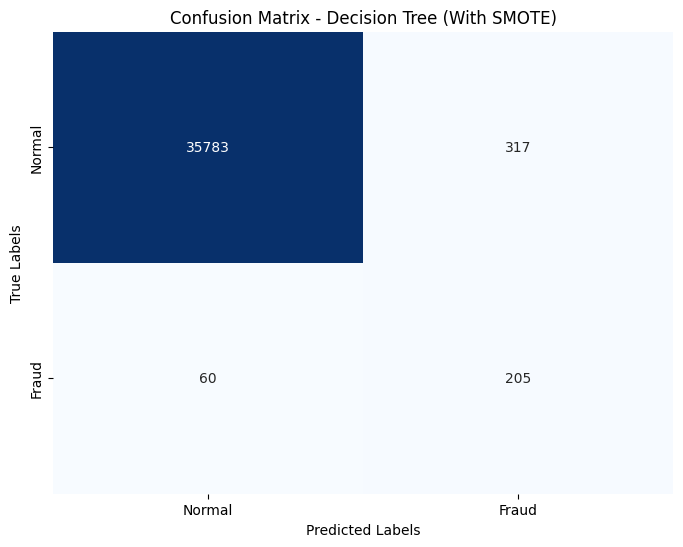

In [66]:
cm_tree_sm = confusion_matrix(y_val, y_pred_tree_sm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree_sm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - Decision Tree (With SMOTE)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**FINAL MODEL**

In [88]:
y_pred_test = xgb_classifier_sm.predict(X_test)

# Create a new DataFrame to store the predictions along with the original data
predictions_df = pd.DataFrame(X_test, columns=X_test.columns)
predictions_df['IsFraud'] = y_pred_test  # Add the predicted fraud column

# Save the predictions to a CSV file
predictions_df.to_csv('team10.csv', index=False)
